<a href="https://colab.research.google.com/github/Ami1ra1/projects/blob/main/Data_Preprocessing_for_Loans_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### 2. Importing and Exploration of the dataset

In [ ]:
# loading the data

df = pd.read_csv('loans.csv')

In [ ]:
# # showing the first 5 rows of the dataset:
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [ ]:
# To check the Dimensions of the dataset:
df.shape

(443, 8)

In [ ]:
# Checking the info of the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    443 non-null    int64  
 1   loan_type    443 non-null    object 
 2   loan_amount  443 non-null    int64  
 3   repaid       443 non-null    int64  
 4   loan_id      443 non-null    int64  
 5   loan_start   443 non-null    object 
 6   loan_end     443 non-null    object 
 7   rate         443 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 27.8+ KB


### 3.Filtering Data

Example: filter high loan amounts

In [ ]:
high_loan= df[df['loan_amount']> df['loan_amount'].mean()]

high_loan.head()


,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


### 4. Converting the data types of columns

    - loan_id to object
    - repaid to category dtype
    - loan_start and loan_end to date type

In [ ]:
df.dtypes

,0
client_id,int64
loan_type,object
loan_amount,int64
repaid,int64
loan_id,int64
loan_start,object
loan_end,object
rate,float64


In [ ]:
df['loan_id']=df['loan_id'].astype('object')

df['repaid']=df['repaid'].astype('category')



In [ ]:
df['loan_start']=pd.to_datetime(df['loan_start'],format='%Y-%m-%d')


df['loan_end']=pd.to_datetime(df['loan_end'],format='%Y-%m-%d')


df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


#### Checking the datatypes again:

In [ ]:
df.dtypes

,0
client_id,int64
loan_type,object
loan_amount,int64
repaid,category
loan_id,object
loan_start,datetime64[ns]
loan_end,datetime64[ns]
rate,float64


### 5. Summary Statistics of the data

In [ ]:
# Numerical summary
summary_stats = df.describe()
print(summary_stats)

# Categorical summary
categorical_summary = df.describe(include='object')
print(categorical_summary)


          client_id   loan_amount                     loan_start  \
count    443.000000    443.000000                            443   
mean   38911.060948   7982.311512  2007-08-02 12:56:53.092550912   
min    25707.000000    559.000000            2000-01-26 00:00:00   
25%    32885.000000   4232.500000            2003-10-19 00:00:00   
50%    39505.000000   8320.000000            2007-03-10 00:00:00   
75%    46109.000000  11739.000000            2011-07-31 00:00:00   
max    49624.000000  14971.000000            2014-11-11 00:00:00   
std     7768.681063   4172.891992                            NaN   

                            loan_end        rate  
count                            443  443.000000  
mean   2009-08-23 11:35:37.246049536    3.217156  
min              2001-08-02 00:00:00    0.010000  
25%              2005-09-12 12:00:00    1.220000  
50%              2009-03-19 00:00:00    2.780000  
75%              2013-09-11 12:00:00    4.750000  
max              2017-05-07 00

### 6. Missing Values

In [ ]:
# use isnull().sum() to check for missing values
df.isnull().sum()

,0
client_id,0
loan_type,0
loan_amount,0
repaid,0
loan_id,0
loan_start,0
loan_end,0
rate,0


### 7.Filtering Data (Focus on Trends)

Example: filter high loan amounts

In [ ]:
high_loans = df[df['loan_amount'] > df['loan_amount'].mean()]
print(high_loans.head())


   client_id loan_type  loan_amount repaid loan_id loan_start   loan_end  rate
0      46109      home        13672      0   10243 2002-04-16 2003-12-20  2.15
1      46109    credit         9794      0   10984 2003-10-21 2005-07-17  1.25
2      46109      home        12734      1   10990 2006-02-01 2007-07-05  0.68
3      46109      cash        12518      1   10596 2010-12-08 2013-05-05  1.24
4      46109    credit        14049      1   11415 2010-07-07 2012-05-21  3.13


### 8.Grouping Data (Pattern Discovery)

Identify trends across categories

In [ ]:
loan_by_type = df.groupby('loan_type')['loan_amount'].mean()
print(loan_by_type)


loan_type
cash      8098.000000
credit    7429.084112
home      8009.347107
other     8388.196262
Name: loan_amount, dtype: float64


### 9. Outliers Treatment

To check for the presence of outliers, we plot Boxplot.

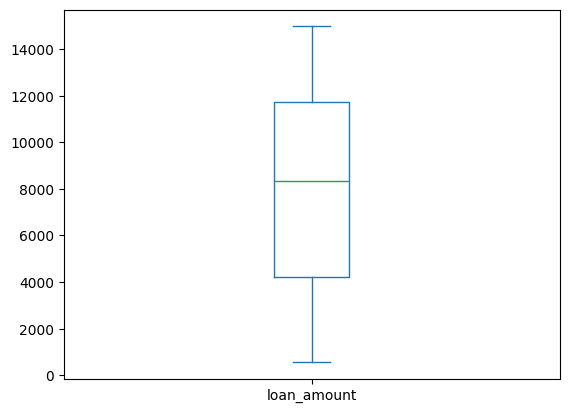

In [ ]:
# For loan_amount
df['loan_amount'].plot(kind='box')
plt.show()

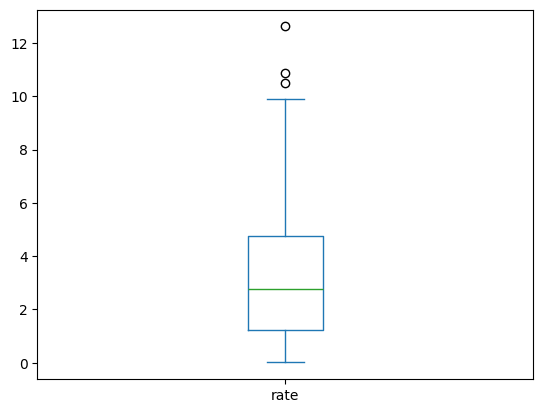

In [ ]:
# For rate
df['rate'].plot(kind='box')
plt.show()

### 10.Correlation Analysis

Find relationships between numerical variables

In [ ]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


             client_id  loan_amount      rate
client_id     1.000000     0.046507  0.058672
loan_amount   0.046507     1.000000 -0.033340
rate          0.058672    -0.033340  1.000000


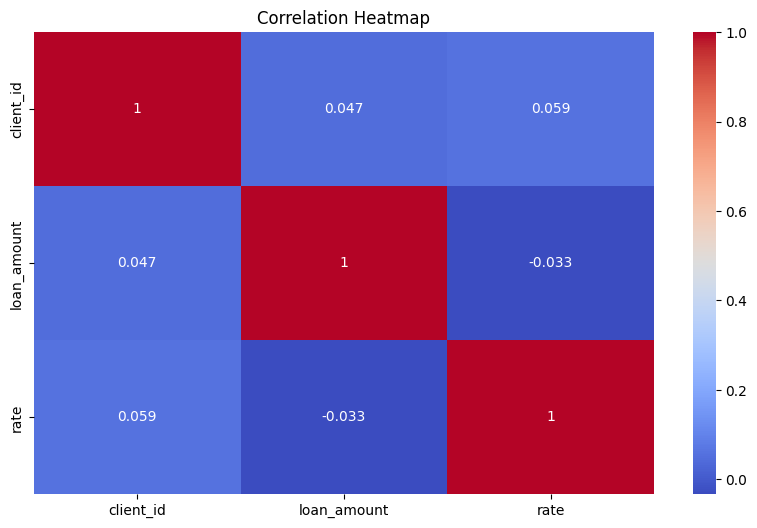

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


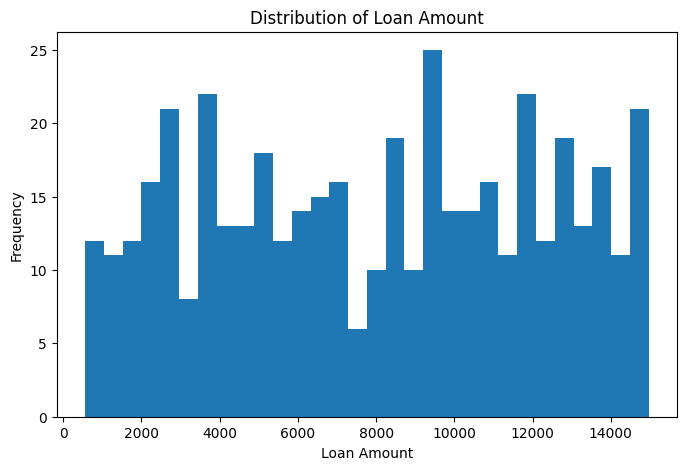

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['loan_amount'], bins=30)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')
plt.show()

In [ ]:
%pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Loan Data Report")
profile.to_file("loan_data_report.html")
profile

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.4 MB/s eta 0:00:00


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 76.77it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]